# 1. Introduction

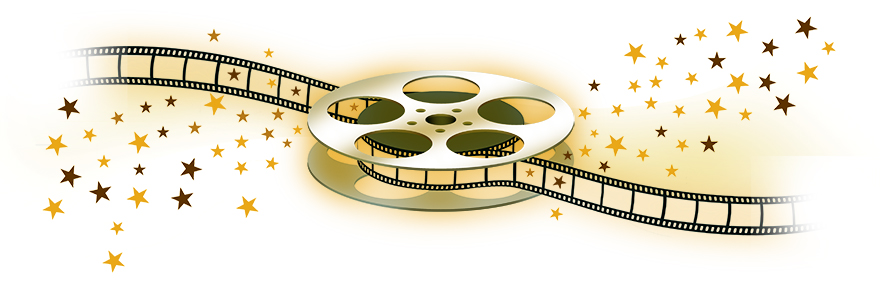

**The project workflow is listed below:**


    The project workflow is listed below:


        1. Introduction
        2. Comet
        3. Import Libraries
        4. Importing Dataset
        5. Data Preprocessing and Data Cleaning
        6. Exploratory Data Analysis
        7.Advanced Preprocessing
        8. Model Selection
        9. Model Evaluation 
        10. Submission
        11. Conclusion

# 2.Comet

In [ ]:
#to be completed once everything is done

# 3.Import Libraries

In [43]:
# Data processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

# Data Preprocessing
import random
from time import time
import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise.model_selection import train_test_split


# Performance evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from surprise import accuracy
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Saving models
import pickle

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")


# 4.Importing datasets

In [ ]:
# # Load the train and test datasets
# df_sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
# df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
# df_imdb= pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
# df_genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
# df_genome_tags= pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
# df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
# df_test= pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
# df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
# df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')

In [25]:
# Load the train and test datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#Import movie datasets
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')

df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

# sample submission
df_sample_submission = pd.read_csv('sample_submission.csv')

# 4. Data Pre-processing and Cleaning


**Exploring The Dataset**

In [29]:
#explore the datasets
df_train.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [30]:
df_test.head(2)

,userId,movieId
0,1,2011
1,1,4144


In [31]:
df_movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
df_imdb.head(2) 

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


In [39]:
df_genome_scores.head(2)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


In [40]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [41]:
df_tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [36]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Check for missing values**

In [11]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [17]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [18]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [19]:
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [20]:
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [24]:
#Tags
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [32]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

**Explore Datasets Shape**

In [33]:
#Print out the Shape of the Dataset
print('Shape of Train Dataset:',df_train.shape)
print('Shape of Test Dataset:',df_test.shape)
print('Shape of Movies Dataset:', df_movies.shape)
print ('Shape of imdb Dataset:', df_imdb.shape) 
print ('Shape of genome_scores Dataset:', df_genome_scores.shape)
print ('Shape of genome_tags Dataset:', df_genome_tags.shape)
print ('Shape of tags Dataset:', df_tags.shape) 
print ('Shape of links Dataset:', df_links.shape) 


Shape of Train Dataset: (10000038, 4)
Shape of Test Dataset: (5000019, 2)
Shape of Movies Dataset: (62423, 3)
Shape of imdb Dataset: (27278, 6)
Shape of genome_scores Dataset: (15584448, 3)
Shape of genome_tags Dataset: (1128, 2)
Shape of tags Dataset: (1093360, 4)
Shape of links Dataset: (62423, 3)


## 6.Exploratory Data Analysis

### 6.1 Most Popular Movie Genres

<BarContainer object of 19 artists>

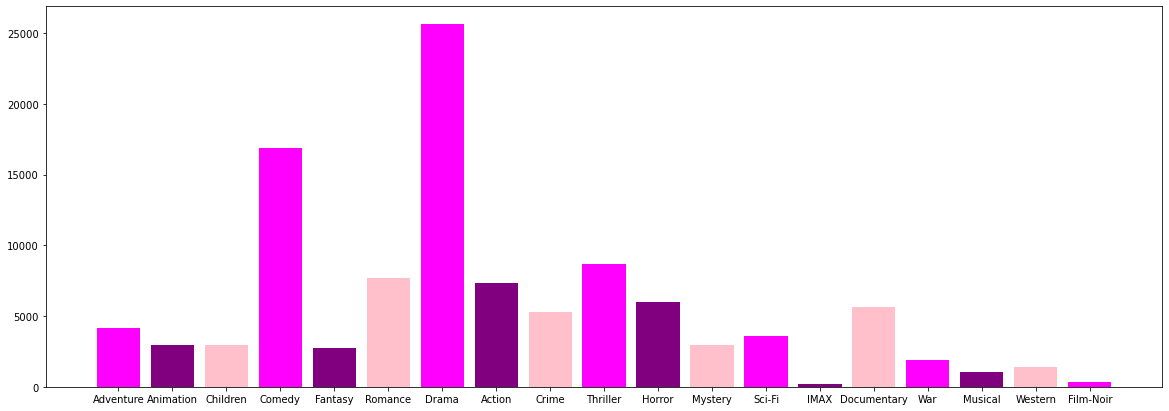

In [78]:
# configure the plot figure size
plt.figure(figsize=(20,7))

# create list of different genres
genre_list = df_movies['genres'].apply(lambda genre_list_movie : str(genre_list_movie).split("|"))
genres_count = {}

# create genre count dictionary
for genre_list_movie in genre_list:
    for genre in genre_list_movie:
        if(genres_count.get(genre,False)):
            genres_count[genre]=genres_count[genre]+1
        else:
            genres_count[genre] = 1       
genres_count.pop("(no genres listed)")

# bar chart to display most watched movie genres
plt.bar(genres_count.keys(),genres_count.values(),color=['magenta', 'purple', 'pink'])

### 6.2 Distribution of  user ratings

In [79]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


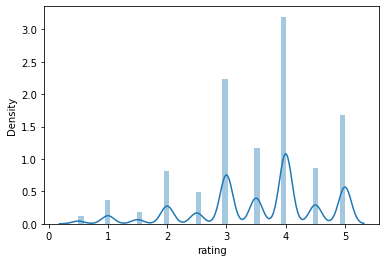

In [80]:
sns.distplot(df_ratings["rating"]);

In [81]:
# display the shapes of both the ratings and movie datasets
print("Shape of frames: \n"+ " Rating DataFrame"+ str(df_ratings.shape)+"\n Movies DataFrame"+ str(df_movies.shape))

Shape of frames: 
 Rating DataFrame(100004, 4)
 Movies DataFrame(62423, 3)


In [82]:
# inner join ratings and movie datasets
df_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId', how='inner')
# drop timestamp column from the merged ratings + movies dataframe
df_ratings_movies = df_ratings_movies.drop('timestamp', axis=1)

In [83]:
#Move to Preprocessing
df_ratings_movies.head(2)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0


### 6.3 Top 10 users who rated the most movies

In [84]:
# group ratings by user
ratings_by_users = df_ratings_movies.groupby('userId').agg([np.size, np.mean])

In [85]:
ratings_by_users.head(2)

movieId              rating          
          size         mean   size      mean
userId                                      
1           20  1675.600000   20.0  2.550000
2           76   354.828947   76.0  3.486842

In [86]:
# drop movieId column
ratings_by_users = ratings_by_users.drop('movieId', axis = 1)

<AxesSubplot:xlabel='userId'>

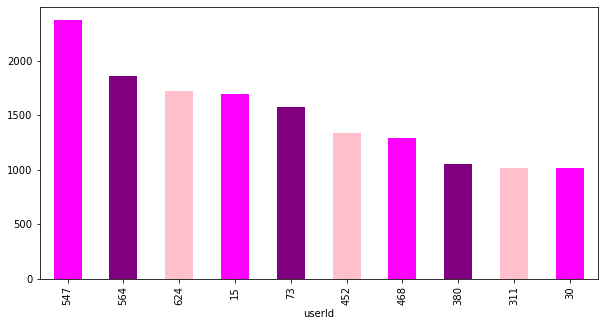

In [87]:
# bar plot showing rating frequency per user
ratings_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize = (10,5), color=['magenta', 'purple', 'pink'])

### 6.4 Ten Highest Rated Movies on Average

In [88]:
# Grouping ratings by movies
ratings_grouped_by_movies = df_ratings_movies.groupby('movieId').agg([np.mean], np.size)
ratings_grouped_by_movies.head()

,userId,rating
,mean,mean
movieId,,
1,338.558704,3.872470
2,318.906542,3.401869
3,374.423729,3.161017
4,355.538462,2.384615
5,320.785714,3.267857


In [89]:
# Drop userId column
ratings_grouped_by_movies = df_ratings_movies.drop('userId', axis=1)

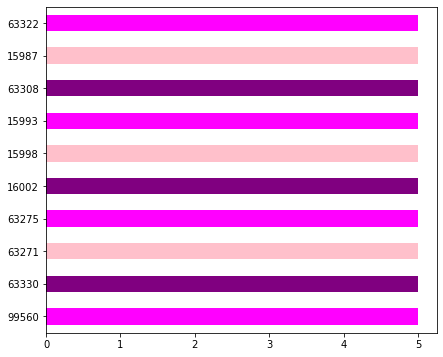

In [90]:
ratings_grouped_by_movies['rating'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6), color=['magenta', 'purple', 'pink']);

### 6.5 Ten Lowest Rated Movies on Average

In [91]:
# filter lowest rated movies
low_rated_movies = ratings_grouped_by_movies['rating'] < 2.5

In [92]:
#creating low rated movies column
low_rated_movies = ratings_grouped_by_movies[low_rated_movies]

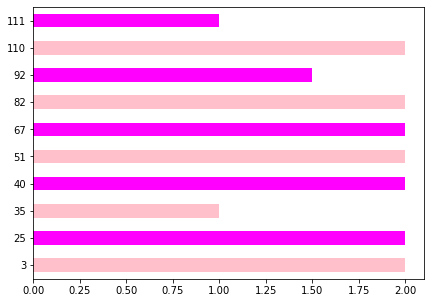

In [97]:
low_rated_movies['rating'].head(10).plot(kind='barh', figsize=(7,5), color=['pink', 'magenta']);

In [1]:
#Add boxplot

**WordCloud**

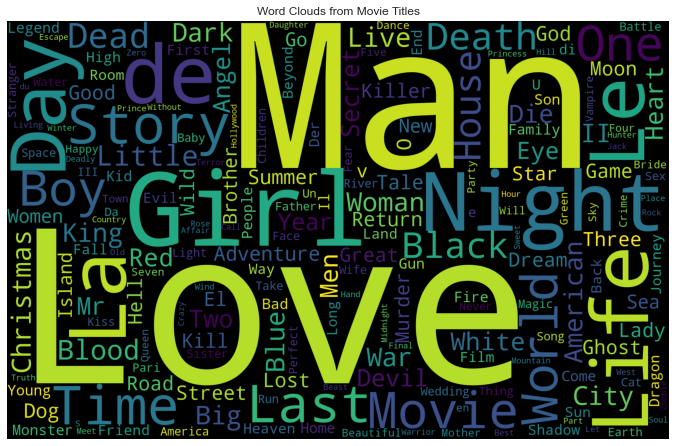

In [45]:
# Wordcloud of movie titles
movies_word = df_movies['title'] = df_movies['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'Black',
                            height = 1200,
                            width = 1900).generate(movies_wordcloud)
plt.figure(figsize = (12,6), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Word Clouds from Movie Titles')
plt.tight_layout(pad=0)
plt.show()

## 7. Advanced Preprocessing (Clustering/MDS/PCA)

In [98]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [99]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
#DO LATER

# ratings_count = []
# ratings_average = []
    
#     for start, end in decades:
#         mask_1 = (df['release_year'] >= start) & (df['release_year'] <= end)
#         mask_2 = (df['rating_year'] >= start_year) & (df['rating_year'] <= end_year)
#         sub_df = df[mask_1 & mask_2]['rating']
#         ratings_count.append(sub_df.count())
#         ratings_average.append(np.round(sub_df.mean(), 2))
    

# 7.Model Selection & Evaluation

In [28]:
#SVD
#Cosine Similarity
#Baseline
#Slope & NMF
#KNN Basic
#KNN With Means

# 8.Submission

In [ ]:
# This is an example
## my_submission = pd.DataFrame({'id': test.Id, 'rating': test.ratings})
# you could use any filename. We choose submission here
## my_submission.to_csv('submission.csv', index=False)

# 10.Conclusion